In [2]:
import csky as cy
import numpy as np

In [3]:
repo = cy.selections.Repository(local_root='/data/user/ssclafani/data/analyses')
specs = cy.selections.DNNCascadeDataSpecs.DNNC_10yr

In [4]:
import scipy.stats

In [5]:
scipy.stats.norm.isf(3.48e-4)

3.3911499886559175

In [6]:
selection_version = 'version-001-p00'

In [7]:
%%time

ana = cy.get_analysis(
    repo, selection_version, specs, 
    #gammas=np.r_[0.1:6.01:0.125],
)

Setting up Analysis for:
DNNCascade_10yr
Setting up DNNCascade_10yr...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/MC_NuGen_bfrv1_2153x.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2011_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2012_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2013_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2014_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2015_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2016_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2017_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2018_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86

In [8]:
a = ana[0]

In [11]:
min(a.data.mjd)

55694.51383162626

In [6]:
src = cy.utils.sources(ra=0,dec=0, deg=True)

In [7]:
        tr = cy.get_trial_runner(ana=ana, src=src, flux=cy.hyp.PowerLawFlux(3), sindec_bandwidth=np.radians(5))

In [8]:
trial = tr.get_one_trial(n_sig=100, poisson=False, seed=1)

In [9]:
inject = tr.sig_injs[0]

In [10]:
len(inject.indices[0])

17365

In [11]:
w = inject.weights

In [12]:
sig = a.sig

In [13]:
sig[inject.indices]

/mnt/lfs7/user/ssclafani/software/external/csky/csky/utils.py:262: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return type(self) ({k:self._dict[k][cond] for k in self.keys()})


Events(17365 items | columns: azimuth, dec, energy, event, log10energy, mjd, ra, run, sigma, sindec, subevent, xdec, xra, true_dec, true_energy, true_ra, oneweight)

In [15]:
import matplotlib.pyplot as plt

In [28]:
len(w[0])
sig[inject.indices[0]]

Events(17365 items | columns: azimuth, dec, energy, event, log10energy, mjd, ra, run, sigma, sindec, subevent, xdec, xra, true_dec, true_energy, true_ra, oneweight)

In [43]:
w_astro =  1e8*sig[inject.indices[0]].oneweight*(sig.true_energy[inject.indices[0]]/1)**-3

In [44]:
w_astro

array([22.44735899, 38.76398418, 22.0909455 , ...,  3.90018072,
        2.68925727,  0.17086867])

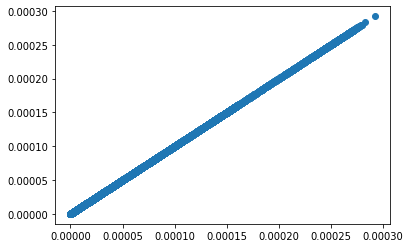

In [50]:
plt.scatter(w[0]/sum(w[0]), w_astro/sum(w_astro))